In [1]:
# Import library yang akan digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from datetime import timedelta

In [2]:
# Konversi dataset dari file .csv menjadi dataframe
data = pd.read_csv('train.csv')
data

,order_id,item_sku,item_name,quantity,order_date,price_per_unit,user_id,country,gmv
0,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08
1,536392,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-01 10:29:00,1.69,13705.0,United Kingdom,27.04
2,536395,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 10:47:00,1.69,13767.0,United Kingdom,54.08
3,536408,84879,ASSORTED COLOUR BIRD ORNAMENT,8,2010-12-01 11:41:00,1.69,14307.0,United Kingdom,13.52
4,536460,84879,ASSORTED COLOUR BIRD ORNAMENT,24,2010-12-01 12:22:00,1.69,14849.0,United Kingdom,40.56
...,...,...,...,...,...,...,...,...,...
7902,575687,23298,SPOTTY BUNTING,21,2011-11-10 16:03:00,4.95,16126.0,United Kingdom,103.95
7903,575751,23298,SPOTTY BUNTING,12,2011-11-11 10:32:00,4.95,14911.0,EIRE,59.40
7904,575838,23298,SPOTTY BUNTING,3,2011-11-11 11:38:00,4.95,13999.0,United Kingdom,14.85
7905,575960,23298,SPOTTY BUNTING,1,2011-11-13 12:28:00,4.95,15429.0,United Kingdom,4.95


<h1>EXPLORATORY DATA ANALYSIS (EDA)</h1>

In [3]:
# Cek keseluruhan feature dalam dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        7907 non-null   int64  
 1   item_sku        7907 non-null   int64  
 2   item_name       7907 non-null   object 
 3   quantity        7907 non-null   int64  
 4   order_date      7907 non-null   object 
 5   price_per_unit  7907 non-null   float64
 6   user_id         7907 non-null   float64
 7   country         7907 non-null   object 
 8   gmv             7907 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 556.1+ KB


<b>INSIGHT:</b><br>
Tidak ada missing value dalam dataset.

Sesuai instruksi pada soal, prediksi akan dilakukan pada setiap minggu (weekly date prediction), sehingga saya mengambil value tanggal pertama dari setiap minggu pada dataset ini.

In [4]:
# Konversi tipe data dari string menuju datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Tambahkan kolom week_date untuk mengambil tanggal pertama dari minggu pada tempat tanggal tersebut berada
data['week_date'] = data['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
data

,order_id,item_sku,item_name,quantity,order_date,price_per_unit,user_id,country,gmv,week_date
0,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-11-29
1,536392,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-01 10:29:00,1.69,13705.0,United Kingdom,27.04,2010-11-29
2,536395,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 10:47:00,1.69,13767.0,United Kingdom,54.08,2010-11-29
3,536408,84879,ASSORTED COLOUR BIRD ORNAMENT,8,2010-12-01 11:41:00,1.69,14307.0,United Kingdom,13.52,2010-11-29
4,536460,84879,ASSORTED COLOUR BIRD ORNAMENT,24,2010-12-01 12:22:00,1.69,14849.0,United Kingdom,40.56,2010-11-29
...,...,...,...,...,...,...,...,...,...,...
7902,575687,23298,SPOTTY BUNTING,21,2011-11-10 16:03:00,4.95,16126.0,United Kingdom,103.95,2011-11-07
7903,575751,23298,SPOTTY BUNTING,12,2011-11-11 10:32:00,4.95,14911.0,EIRE,59.40,2011-11-07
7904,575838,23298,SPOTTY BUNTING,3,2011-11-11 11:38:00,4.95,13999.0,United Kingdom,14.85,2011-11-07
7905,575960,23298,SPOTTY BUNTING,1,2011-11-13 12:28:00,4.95,15429.0,United Kingdom,4.95,2011-11-07


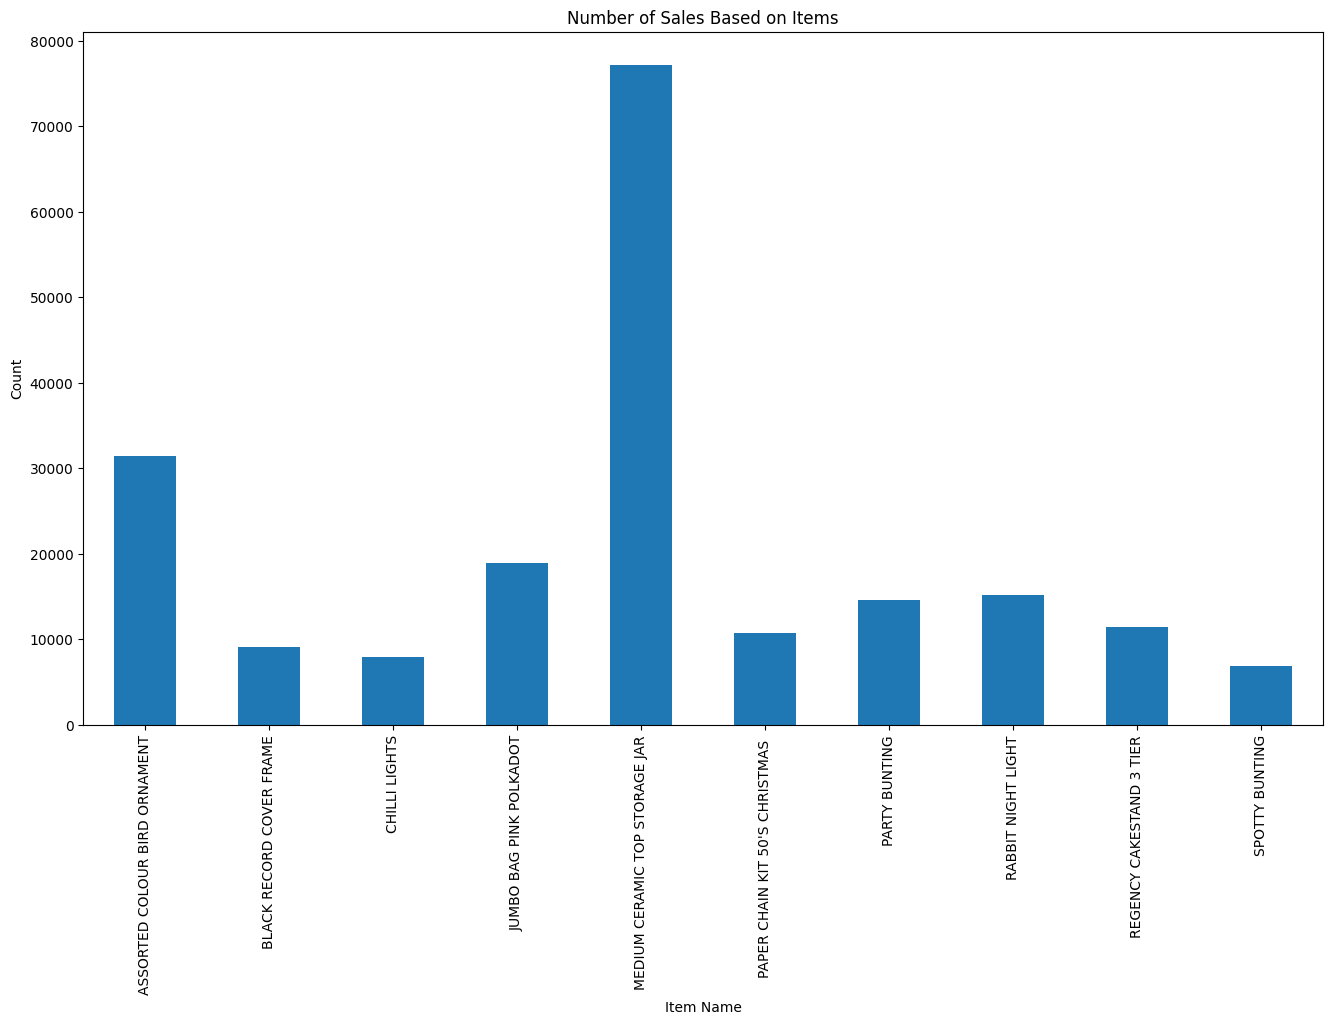

In [5]:
# Plot total jumlah penjualan dari setiap produk
plt.figure(figsize=(16, 9))
# Setiap data dalam dataset harus dikelompokkan terlebih dahulu berdasarkan item_name untuk dihitung totalnya
data.groupby('item_name')['quantity'].sum().plot(kind='bar')
plt.title('Number of Sales Based on Items')
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.show()

<b>INSIGHT:</b><br>
Dicurigai terdapat data outlier, sebab produk "Medium Ceramic Top Storage Jar" memiliki total produk terjual yang sangat tinggi. Meskipun memungkinkan, tetapi untuk penjualan secara normalnya dirasa sulit untuk menjual sampai sebanyak itu jika tidak ada event khusus. Hal ini bisa saja mengganggu prediksi ke depannya.<br>
Penanganan selanjutnya adalah menghilangkan data outlier.

Pembuangan data outlier (pencilan) dengan menggunakan metode Z-score

In [6]:
# Tentukan mean data quantity
mean = data['quantity'].mean()

# Tentukan standar deviasi data quantity
std = data['quantity'].std()

# Tentukan batas atas dan bawah data quantity sebesar 3 kali standar deviasi
Tmin = mean - (3 * std)
Tmax = mean + (3 * std)

# Filter nilai yang menjadi outlier
filtered_values = data[(data['quantity'] < Tmin) | (data['quantity'] > Tmax)]['quantity'].values
filtered_values

array([ 2880, 74215], dtype=int64)

<b>INSIGHT:</b><br>
Tampak bahwa ada 2 data yang secara matematis merupakan outlier dalam dataset. Salah satunya bernilai sangat ekstrem, di mana ada penjualan dalam sekali transaksi sebanyak 74 ribu produk yang sama. Saya menganggap ini bukan bentuk data yang normal, sehingga data outlier ini sangat meyakinkan untuk dihapus.

In [7]:
# Menghapus data outlier dari dataframe
data = data[~data['quantity'].isin(filtered_values)]
data

,order_id,item_sku,item_name,quantity,order_date,price_per_unit,user_id,country,gmv,week_date
0,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-11-29
1,536392,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-01 10:29:00,1.69,13705.0,United Kingdom,27.04,2010-11-29
2,536395,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 10:47:00,1.69,13767.0,United Kingdom,54.08,2010-11-29
3,536408,84879,ASSORTED COLOUR BIRD ORNAMENT,8,2010-12-01 11:41:00,1.69,14307.0,United Kingdom,13.52,2010-11-29
4,536460,84879,ASSORTED COLOUR BIRD ORNAMENT,24,2010-12-01 12:22:00,1.69,14849.0,United Kingdom,40.56,2010-11-29
...,...,...,...,...,...,...,...,...,...,...
7902,575687,23298,SPOTTY BUNTING,21,2011-11-10 16:03:00,4.95,16126.0,United Kingdom,103.95,2011-11-07
7903,575751,23298,SPOTTY BUNTING,12,2011-11-11 10:32:00,4.95,14911.0,EIRE,59.40,2011-11-07
7904,575838,23298,SPOTTY BUNTING,3,2011-11-11 11:38:00,4.95,13999.0,United Kingdom,14.85,2011-11-07
7905,575960,23298,SPOTTY BUNTING,1,2011-11-13 12:28:00,4.95,15429.0,United Kingdom,4.95,2011-11-07


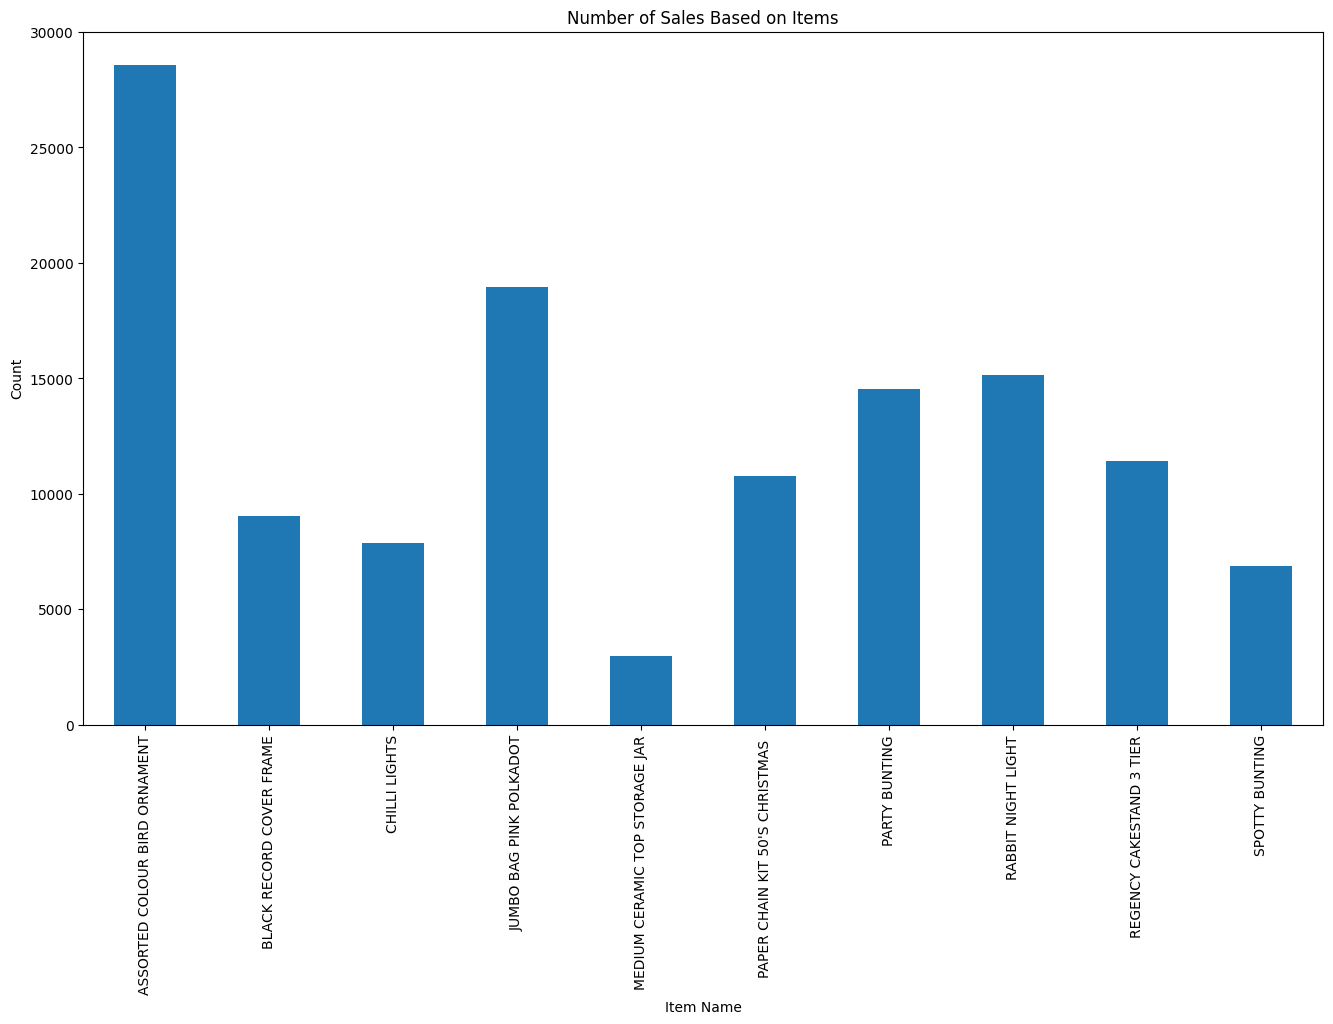

In [8]:
# Plot akhir setelah data outlier dibuang
plt.figure(figsize=(16, 9))
data.groupby('item_name')['quantity'].sum().plot(kind='bar')
plt.title('Number of Sales Based on Items')
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.show()

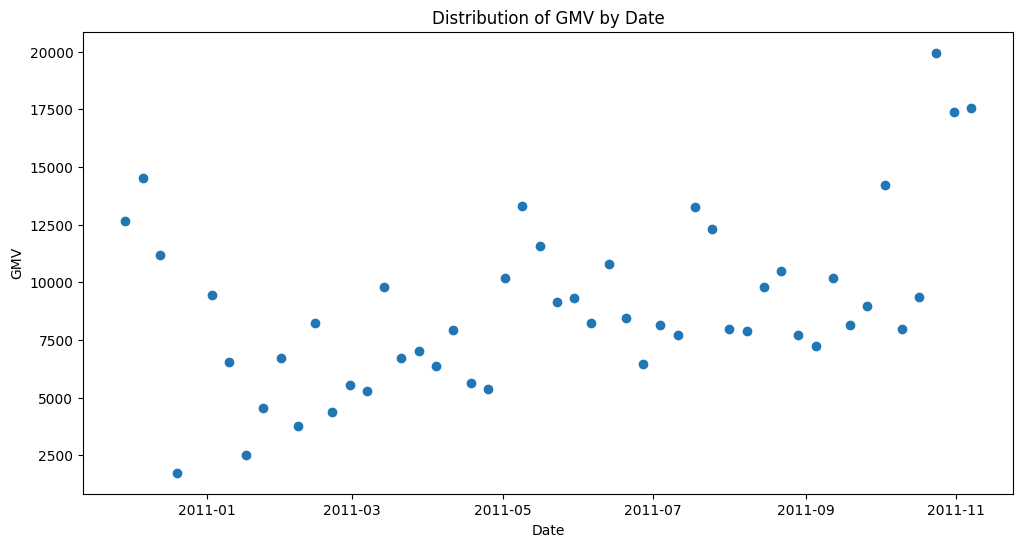

In [9]:
# Plotting untuk membuat scatter plot feature GMV terhadap waktu

quantity_by_date = data.groupby('week_date')['gmv'].sum().reset_index()
quantity_by_date = quantity_by_date.sort_values('week_date')

plt.figure(figsize=(12, 6))
plt.scatter(quantity_by_date['week_date'], quantity_by_date['gmv'])
plt.title('Distribution of GMV by Date')
plt.xlabel('Date')
plt.ylabel('GMV')
plt.show()

<b>INSIGHT:</b><br>
Sebaran data setelah pembuangan data outlier terbilang cukup merata dan tidak ada data yang terlalu menyimpang dari data-data lainnya.

In [ ]:
# Cek total pemasukan dari setiap produk yang telah terjual
product_gmv = data.groupby('item_name')['gmv'].sum().reset_index()
product_gmv

item_name
ASSORTED COLOUR BIRD ORNAMENT       46172.46
BLACK RECORD COVER FRAME            30916.86
CHILLI LIGHTS                       37311.97
JUMBO BAG PINK POLKADOT             34986.88
MEDIUM CERAMIC TOP STORAGE JAR       3433.93
PAPER CHAIN KIT 50'S CHRISTMAS      29256.41
PARTY BUNTING                       65500.82
RABBIT NIGHT LIGHT                  28817.86
REGENCY CAKESTAND 3 TIER           131289.10
SPOTTY BUNTING                      32136.85
Name: gmv, dtype: float64

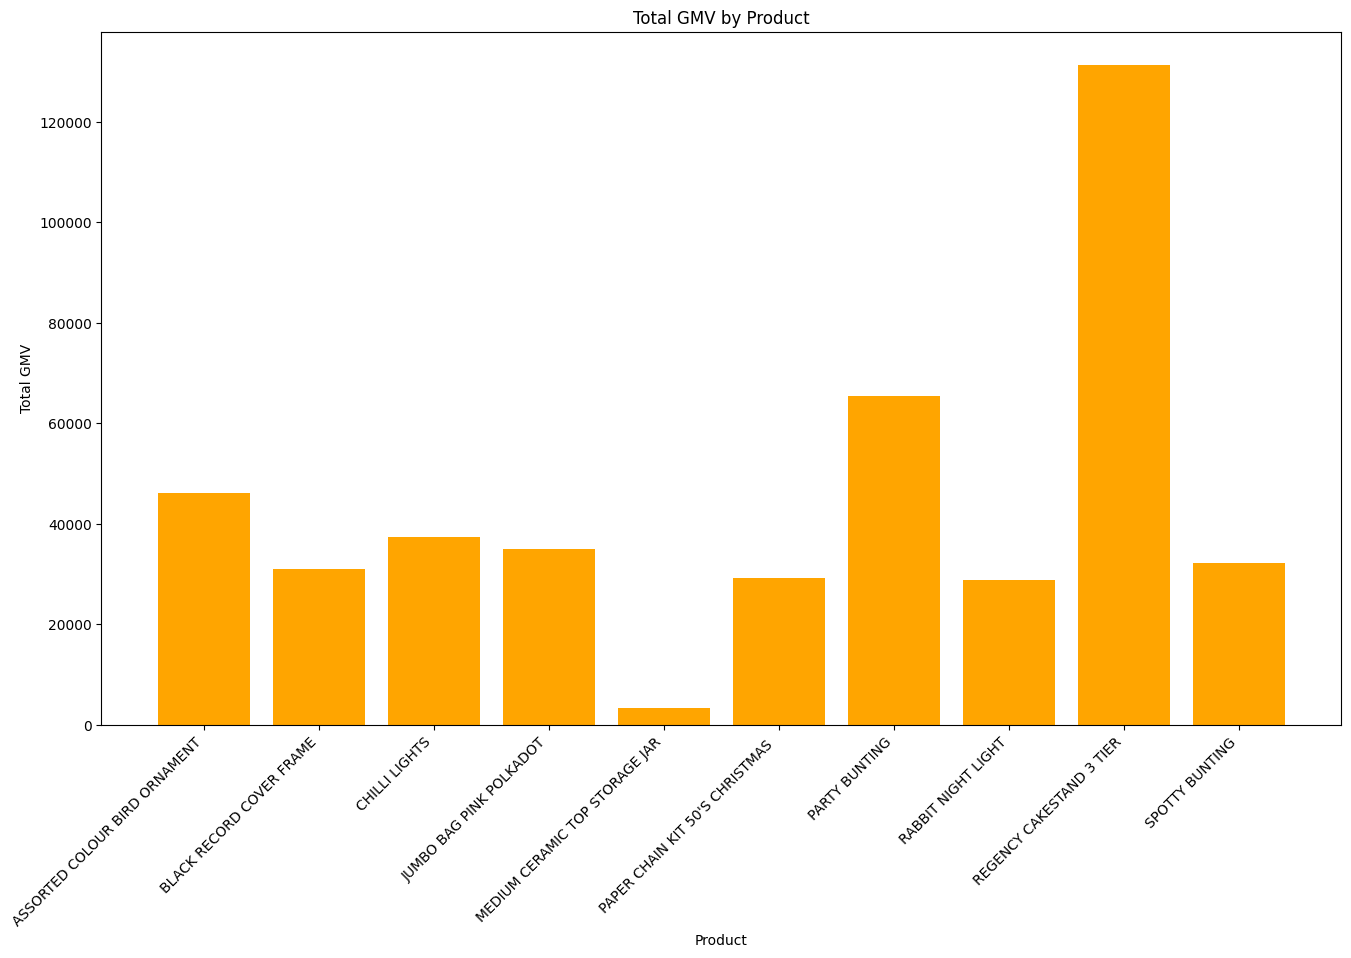

In [11]:
# Plot total pemasukan dari setiap produk yang telah terjual
plt.figure(figsize=(16, 9))
plt.bar(product_gmv['item_name'], product_gmv['gmv'], color='orange')
plt.title('Total GMV by Product')
plt.xlabel('Product')
plt.ylabel('Total GMV')
plt.xticks(rotation=45, ha='right')
plt.show()

<b>INSIGHT:</b><br>
Produk "Regency Cakestand 3 Tier" memperoleh pemasukan yang paling tinggi secara keseluruhan, tetapi kuantitas terjualnya tidak sebanyak produk "Assorted Colour Bird Ornament". Artinya kedua feature ini memiliki nilai tinggi karena sebab alami, yaitu sebab harga per unit pada produk "Regency Cakestand 3 Tier" yang lebih tinggi dari produk "Assorted Colour Bird Ornament".

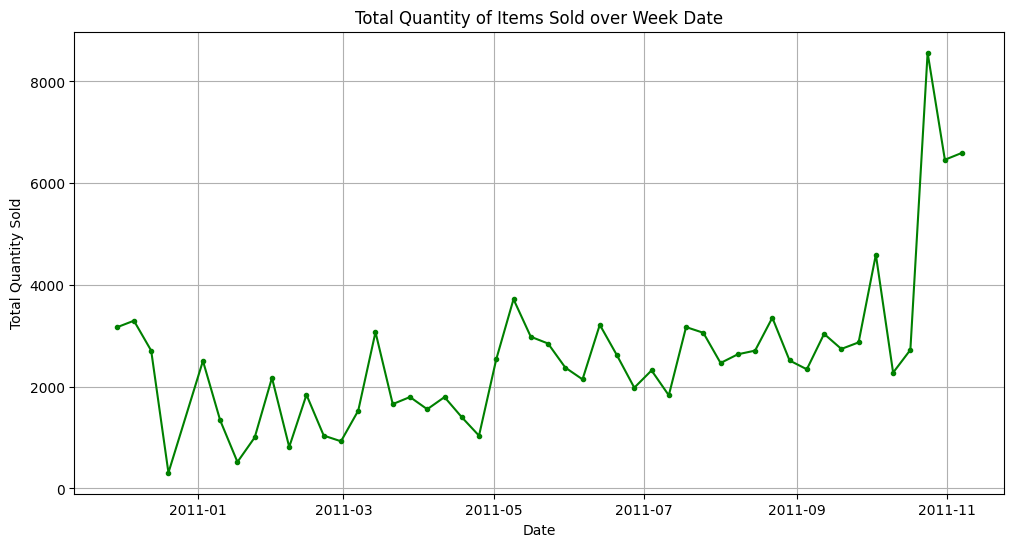

In [12]:
# Membuat line plot tren pergerakan data sepanjang waktu terhadap kuantitas terjual setiap minggu
quantity_by_date = data.groupby('week_date')['quantity'].sum().reset_index()
quantity_by_date = quantity_by_date.sort_values(by='week_date')

plt.figure(figsize=(12, 6))
plt.plot(quantity_by_date['week_date'], quantity_by_date['quantity'], marker='.', color='green')
plt.title('Total Quantity of Items Sold over Week Date')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(visible=True)
plt.show()

Selanjutnya data akan dikelompokkan berdasarkan item id untuk dihitung kuantitasnya per-minggu

<b>TAMBAHAN:</b><br>
Untuk kuantitas yang kosong, seharusnya diisi nilai 0, tetapi instruksi soal menyatakan bahwa metric yang dipakai adalah MAPE. MAPE merupakan metrics yang sangat sensitif terhadap nilai 0, sehingga penggunaannya akan mengakibatkan nilai MAPE yang melonjak menjadi sangat besar. Untuk menghindari hal ini, data kuantitas yang kosong akan diisi dengan nilai 1. Nilai ini tidak terlalu jauh dari 0 dan tidak akan mempengaruhi kualitas prediksi secara signifikan.

In [13]:
# Pengelompokan data berdasarkan week date dan item id
weekly_data = data.groupby(['item_sku', 'week_date']).agg({'quantity': 'sum'}).reset_index()

# Pivot data menjadi tabel sehingga kuantitas terjumlah berdasarkan item id dan week date
pivot_data = weekly_data.pivot(index='week_date', columns='item_sku', values='quantity').fillna(1)
pivot_data

item_sku,21137,22086,22386,22423,23084,23166,23298,47566,79321,84879
week_date,,,,,,,,,,
2010-11-29,637.0,511.0,102.0,456.0,1.0,1.0,1.0,13.0,567.0,880.0
2010-12-06,573.0,681.0,245.0,648.0,1.0,1.0,1.0,138.0,263.0,749.0
2010-12-13,574.0,449.0,102.0,379.0,1.0,1.0,1.0,24.0,583.0,598.0
2010-12-20,54.0,56.0,1.0,87.0,1.0,1.0,1.0,15.0,57.0,40.0
2011-01-03,177.0,1.0,539.0,237.0,1.0,1.0,1.0,142.0,932.0,480.0
2011-01-10,20.0,1.0,296.0,382.0,1.0,1.0,1.0,58.0,172.0,410.0
2011-01-17,20.0,1.0,51.0,106.0,1.0,1.0,1.0,58.0,162.0,123.0
2011-01-24,3.0,1.0,187.0,217.0,1.0,1.0,1.0,162.0,98.0,336.0
2011-01-31,592.0,1.0,209.0,139.0,1.0,1.0,1.0,214.0,83.0,937.0


<h1>PREPROCESSING</h1>

Standardisasi dengan menggunakan Z-Score Normalization untuk memperkecil range data agar lebih mudah dipahami oleh model.

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_data)

Penetapan variabel independen dan dependen untuk dimasukkan ke dalam model.

In [15]:
# Time step mewakili langkahan waktu yang diingat oleh model
time_steps = 10
# Future weeks mewakili waktu di masa depan yang akan diprediksi
future_weeks = 3

# Fungsi untuk menetapkan nilai X (variabel independen) dan y (variabel dependen)
def create_sequences(data, time_steps=10):
    X = []
    y = []

    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])

    return np.array(X), np.array(y)

In [16]:
# Ambil nilai X dan y dari fungsi terhadap data yang sudah distandardisasi
X, y = create_sequences(scaled_data, time_steps)
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

In [17]:
# Pembagian dataset ke dalam 80% data training, 10% data validation, dan 10% data testing (tidak diacak)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)

<b>TAMBAHAN:</b><br>
Pembagian dataset untuk training, validation, dan testing biasanya diacak. Akan tetapi, untuk pemodelan time-series pada umumnya dibiarkan tetap terurut menyesuaikan dengan lini waktunya. Pengacakan hanya akan menyebabkan prediksi menjadi kacau dan tidak akurat. (Effrosynidis, et al., 2023)

<h1>MODEL CONSTRUCTION</h1>

Model yang akan saya pakai adalah model Bidirectional LSTM (Long-Short Term Memory). LSTM merupakan salah satu pengembangan dari RNN (Recurrent Neural Network), suatu model deep learning yang memiliki kemampuan untuk melakukan prediksi berdasarkan data sequential yang telah dilalui dan akan dilalui (Siami-Namini, et al., 2019). Saya merasa bahwa data yang diberikan ini adalah data time-series, sehingga nilai yang terjadi saat ini memiliki pengaruh dari nilai masa lalunya. Dengan demikian, model Bi-LSTM ini dirasa cocok untuk melaksanakan tugas ini.

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)
    ), # Layer Bidirectional LSTM
    tf.keras.layers.LSTM(32, activation='relu'), # Layer LSTM
    tf.keras.layers.Dropout(0.2), # Layer Dropout untuk mencegah overfitting
    tf.keras.layers.Dense(y_train.shape[1]) # Layer Dense output sebagai hasil akhir
])

# Compile model dengan optimizer RMSProp, loss MSE dan metric MAPE
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01), loss='mse', metrics=['mape'])
# Terapkan early stopping untuk menghentikan kerja model jika ditemukan tanda-tanda overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train model dengan epoch maksimum 100 dan batch size 16
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 475ms/step - loss: 0.7886 - mape: 144.1296 - val_loss: 1.0967 - val_mape: 115.2013
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6786 - mape: 112.2661 - val_loss: 1.1159 - val_mape: 155.4111
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.6080 - mape: 183.6187 - val_loss: 1.1244 - val_mape: 112.6406
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7819 - mape: 122.5860 - val_loss: 1.1002 - val_mape: 113.6890


<h1>MODEL EVALUATION</h1>

Plotting Mean Absolute Percentage Error (MAPE) untuk training dan validation

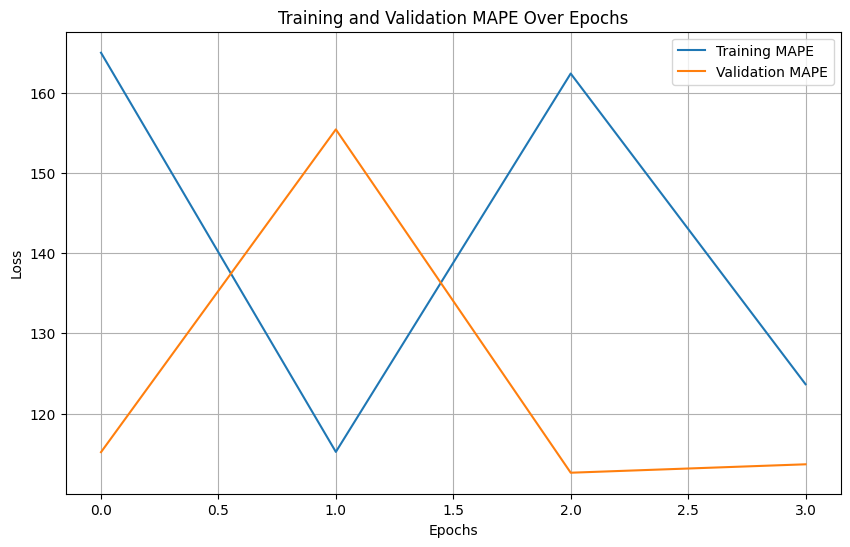

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['mape'], label='Training MAPE')
plt.plot(history.history['val_mape'], label='Validation MAPE')
plt.title('Training and Validation MAPE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

<b>INSIGHT:</b><br>
Jarak yang terbentuk antara training dan validation terbilang rendah dan nilainya semakin konvergen (mendekat satu sama lain), sehingga model bisa dikategorikan tidak mengalami underfitting ataupun overfitting.

Plotting Training Loss dan Validation Loss

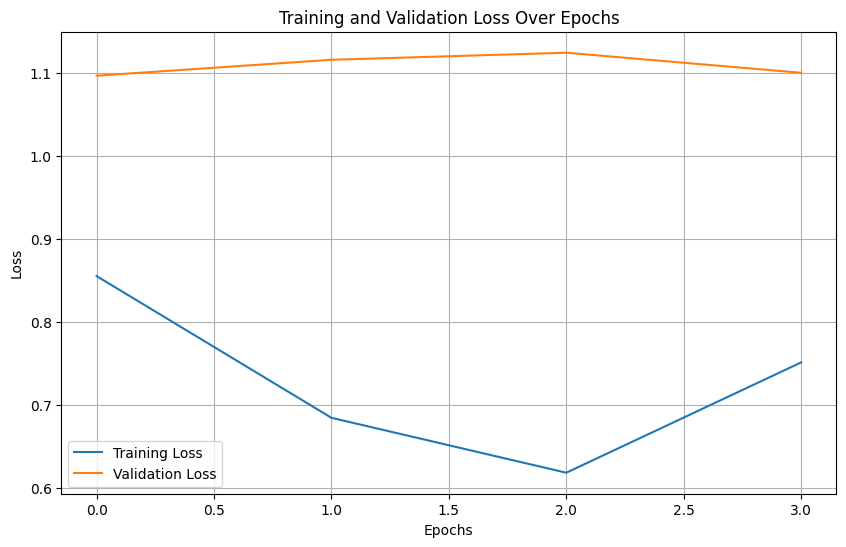

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

<b>INSIGHT:</b><br>
Jarak yang terbentuk antara training dan validation terbilang rendah dan nilainya semakin konvergen (mendekat satu sama lain), sehingga model bisa dikategorikan tidak mengalami underfitting ataupun overfitting.

In [21]:
# Terapkan model untuk memprediksi data testing
y_pred = model.predict(X_test)

# Hasil prediksi dan data asli dikembalikan ke kondisi sebelum normalisasi
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Hitung nilai evaluation score untuk task regresi

In [22]:
# Hitung nilai MAE dan MAPE
mae = mean_absolute_error(y_test, y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)

print(f"Model Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Model Performance on Test Set:
Mean Absolute Error (MAE): 247.54
Mean Absolute Percentage Error (MAPE): 6.53%


<b>INSIGHT:</b><br>
Nilai MAPE testing berada di range yang lebih kecil dari 10%. Nilai ini tergolong sebagai highly-accurate forecasting (Moreno, et al., 2013).

<h1>MODEL IMPLEMENTATION</h1>

In [23]:
# Buat nilai prediksi dari model yang telah ditraining
last_sequence = scaled_data[-time_steps:]
predictions = []

# Prediksi dilakukan untuk 3 minggu ke depan
for week in range(future_weeks):
    last_sequence_reshaped = last_sequence.reshape((1, time_steps, last_sequence.shape[1]))
    pred = model.predict(last_sequence_reshaped)
    predictions.append(pred[0])
    last_sequence = np.vstack([last_sequence[1:], pred])

# Nilai prediksi masih terstandardisasi, sehingga perlu dikembalikan ke bentuk asli sebelum normalisasi
predictions = scaler.inverse_transform(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [24]:
result = pd.DataFrame()

# Hasil prediksi dibuat dalam bentuk dataframe
for i in range(future_weeks):
    week_date = pivot_data.index[-1] + timedelta(weeks=i + 1)
    week_pred = pd.DataFrame({
        'item_sku': pivot_data.columns,
        'week_date': week_date,
        'prediction': predictions[i].astype(int)
    })
    result = pd.concat([result, week_pred])

# Dataframe dikonversi kembali ke dalam file .csv baru dengan nama 'sales_forecast.csv'
result.to_csv('sales_forecast.csv', index=False)

<h1>REFERENSI</h1>

<li>Effrosynidis, D., Spiliotis, E., Sylaios, G., & Arampatzis, A. (2023). Time series and regression methods for univariate environmental forecasting: An empirical evaluation. Science of The Total Environment, 875, 162580.</li>
<li>Moreno, J. J. M., Pol, A. P., Abad, A. S., & Blasco, B. C. (2013). Using the R-MAPE index as a resistant measure of forecast accuracy. Psicothema, 25(4), 500-506.</li>
<li>Siami-Namini, S., Tavakoli, N., & Namin, A. S. (2019, December). The performance of LSTM and BiLSTM in forecasting time series. In 2019 IEEE International conference on big data (Big Data) (pp. 3285-3292). IEEE.</li>